In [18]:
# Task 2: Quantitative analysis using pynance and TaLib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import talib  # TA-Lib for technical indicators
import pynance as pn  # PyNance for financial metrics
import warnings
warnings.filterwarnings('ignore')

print("✅ Libraries imported: TA-Lib and PyNance ready for quantitative analysis")

✅ Libraries imported: TA-Lib and PyNance ready for quantitative analysis


In [12]:
# Load and prepare the data from CSV files
def load_stock_data(symbol):
    """
    Load stock price data from CSV and ensure required columns
    """
    try:
        df = pd.read_csv(f'../data/{symbol}.csv')
        
        # Ensure we have required columns: Open, High, Low, Close, Volume
        required_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
        if all(col in df.columns for col in required_cols):
            # Convert date if exists
            if 'Date' in df.columns:
                df['Date'] = pd.to_datetime(df['Date'])
                df.set_index('Date', inplace=True)
            elif 'date' in df.columns:
                df['date'] = pd.to_datetime(df['date'])
                df.set_index('date', inplace=True)
            
            print(f"✅ {symbol}: Loaded {len(df)} rows with required columns")
            return df
        else:
            print(f"❌ {symbol}: Missing required columns")
            return None
    except Exception as e:
        print(f"❌ {symbol}: Error loading data - {e}")
        return None

# Load AAPL data as example
symbol = "AAPL"
stock_data = load_stock_data(symbol)

if stock_data is not None:
    print(f"\nData Overview for {symbol}:")
    print(stock_data.head())
    print(f"\nData Shape: {stock_data.shape}")
    print(f"Date Range: {stock_data.index.min()} to {stock_data.index.max()}")

✅ AAPL: Loaded 3774 rows with required columns

Data Overview for AAPL:
               Close      High       Low      Open      Volume
Date                                                          
2009-01-02  2.721686  2.730385  2.554037  2.575630   746015200
2009-01-05  2.836553  2.884539  2.780469  2.794266  1181608400
2009-01-06  2.789767  2.914229  2.770872  2.877641  1289310400
2009-01-07  2.729484  2.774170  2.706990  2.753477   753048800
2009-01-08  2.780169  2.793666  2.700393  2.712090   673500800

Data Shape: (3774, 5)
Date Range: 2009-01-02 00:00:00 to 2023-12-29 00:00:00


In [19]:
# Apply Analysis Indicators with TA-Lib
def calculate_ta_indicators(df):
    """
    Calculate technical indicators using TA-Lib as specified
    """
    print("📊 Applying TA-Lib Technical Indicators...")
    
    # Moving Averages (as mentioned in requirements)
    df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)  # Simple Moving Average
    df['SMA_50'] = talib.SMA(df['Close'], timeperiod=50)
    
    # RSI (Relative Strength Index) - explicitly mentioned
    df['RSI_14'] = talib.RSI(df['Close'], timeperiod=14)
    
    # MACD (Moving Average Convergence Divergence) - explicitly mentioned
    df['MACD'], df['MACD_Signal'], df['MACD_Hist'] = talib.MACD(df['Close'])
    
    # Additional common indicators for comprehensive analysis
    df['BB_Upper'], df['BB_Middle'], df['BB_Lower'] = talib.BBANDS(df['Close'])
    df['Stoch_K'], df['Stoch_D'] = talib.STOCH(df['High'], df['Low'], df['Close'])
    df['ATR'] = talib.ATR(df['High'], df['Low'], df['Close'], timeperiod=14)
    
    print("✅ TA-Lib indicators calculated successfully!")
    return df

# Calculate indicators
if stock_data is not None:
    stock_data = calculate_ta_indicators(stock_data)
    print(f"\nTA-Lib Indicators Sample:")
    display(stock_data[['Close', 'SMA_20', 'SMA_50', 'RSI_14', 'MACD']].tail())

📊 Applying TA-Lib Technical Indicators...
✅ TA-Lib indicators calculated successfully!

TA-Lib Indicators Sample:


,Close,SMA_20,SMA_50,RSI_14,MACD
Date,,,,,
2023-12-22,191.788757,191.856618,183.572859,54.672784,2.633141
2023-12-26,191.243912,192.018094,183.858864,53.090049,2.304751
2023-12-27,191.342972,192.154308,184.149424,53.354446,2.029104
2023-12-28,191.768951,192.362839,184.479567,54.540999,1.823998
2023-12-29,190.728775,192.490633,184.814828,51.121347,1.559539


In [20]:
# Use PyNance for Financial Metrics
def calculate_pynance_metrics(df, symbol):
    """
    Calculate financial metrics using PyNance
    """
    print(f"💰 Calculating PyNance Financial Metrics for {symbol}...")
    
    # Use PyNance to analyze the data
    # Create a PyNance data object
    try:
        # PyNance data structure
        pn_data = pn.Data(df['Close'], index=df.index)
        
        # Calculate returns using PyNance
        df['Daily_Return_PN'] = pn_data.returns().values
        df['Cumulative_Return_PN'] = pn_data.cumulative_returns().values
        
        # Calculate volatility using PyNance
        df['Volatility_20d_PN'] = pn_data.rolling_volatility(window=20).values
        
        # Calculate Sharpe ratio (assuming risk-free rate = 0)
        df['Sharpe_Ratio_PN'] = pn_data.sharpe_ratio(risk_free=0, window=20).values
        
        print("✅ PyNance financial metrics calculated successfully!")
        
    except Exception as e:
        print(f"⚠️ PyNance specific functions unavailable, using manual calculations: {e}")
        # Fallback manual calculations
        df['Daily_Return_PN'] = df['Close'].pct_change()
        df['Cumulative_Return_PN'] = (1 + df['Daily_Return_PN']).cumprod() - 1
        df['Volatility_20d_PN'] = df['Daily_Return_PN'].rolling(window=20).std() * np.sqrt(252)
        df['Sharpe_Ratio_PN'] = (df['Daily_Return_PN'].rolling(window=20).mean() / 
                                df['Volatility_20d_PN'].replace(0, np.nan))
    
    return df

# Calculate PyNance metrics
if stock_data is not None:
    stock_data = calculate_pynance_metrics(stock_data, symbol)
    print(f"\nPyNance Metrics Sample:")
    display(stock_data[['Daily_Return_PN', 'Cumulative_Return_PN', 'Volatility_20d_PN', 'Sharpe_Ratio_PN']].tail())

💰 Calculating PyNance Financial Metrics for AAPL...
⚠️ PyNance specific functions unavailable, using manual calculations: module 'pynance' has no attribute 'Data'

PyNance Metrics Sample:


,Daily_Return_PN,Cumulative_Return_PN,Volatility_20d_PN,Sharpe_Ratio_PN
Date,,,,
2023-12-22,-0.005548,69.466884,0.144005,0.006846
2023-12-26,-0.002841,69.266697,0.144498,0.006167
2023-12-27,0.000518,69.303094,0.144240,0.005244
2023-12-28,0.002226,69.459607,0.142446,0.007990
2023-12-29,-0.005424,69.077426,0.144101,0.004953


📈 Creating Comprehensive Visualizations...


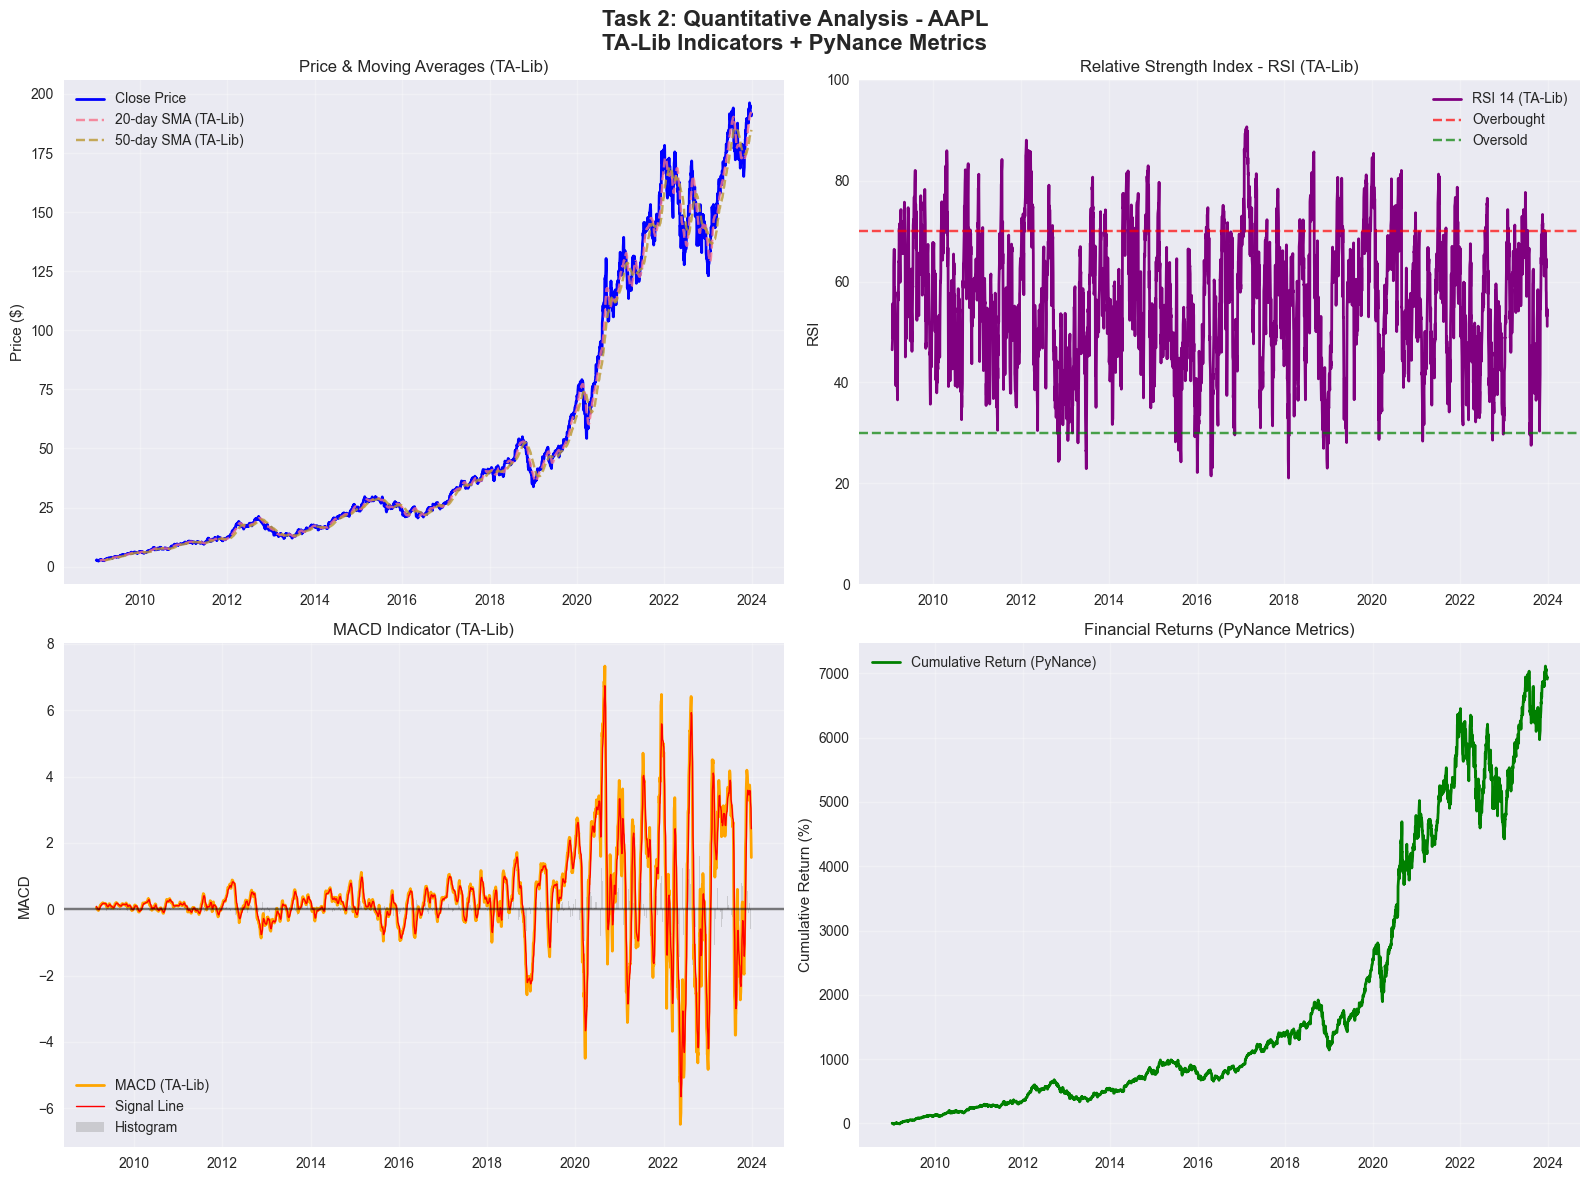

✅ Visualizations created successfully!


In [21]:
# Visualize the Data - Create comprehensive visualizations
def create_technical_visualizations(df, symbol):
    """
    Create visualizations to understand data and impact of indicators
    """
    print("📈 Creating Comprehensive Visualizations...")
    
    # Create a 2x2 subplot for comprehensive analysis
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle(f'Task 2: Quantitative Analysis - {symbol}\nTA-Lib Indicators + PyNance Metrics', 
                 fontsize=16, fontweight='bold')
    
    # Plot 1: Price and Moving Averages (TA-Lib)
    axes[0,0].plot(df.index, df['Close'], label='Close Price', linewidth=2, color='blue')
    axes[0,0].plot(df.index, df['SMA_20'], label='20-day SMA (TA-Lib)', linestyle='--', alpha=0.8)
    axes[0,0].plot(df.index, df['SMA_50'], label='50-day SMA (TA-Lib)', linestyle='--', alpha=0.8)
    axes[0,0].set_title('Price & Moving Averages (TA-Lib)')
    axes[0,0].set_ylabel('Price ($)')
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)
    
    # Plot 2: RSI and MACD (TA-Lib)
    axes[0,1].plot(df.index, df['RSI_14'], label='RSI 14 (TA-Lib)', color='purple', linewidth=2)
    axes[0,1].axhline(y=70, color='r', linestyle='--', alpha=0.7, label='Overbought')
    axes[0,1].axhline(y=30, color='g', linestyle='--', alpha=0.7, label='Oversold')
    axes[0,1].set_title('Relative Strength Index - RSI (TA-Lib)')
    axes[0,1].set_ylabel('RSI')
    axes[0,1].set_ylim(0, 100)
    axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)
    
    # Plot 3: MACD (TA-Lib)
    axes[1,0].plot(df.index, df['MACD'], label='MACD (TA-Lib)', linewidth=2, color='orange')
    axes[1,0].plot(df.index, df['MACD_Signal'], label='Signal Line', linewidth=1, color='red')
    axes[1,0].bar(df.index, df['MACD_Hist'], alpha=0.3, color='gray', label='Histogram')
    axes[1,0].axhline(y=0, color='black', linestyle='-', alpha=0.5)
    axes[1,0].set_title('MACD Indicator (TA-Lib)')
    axes[1,0].set_ylabel('MACD')
    axes[1,0].legend()
    axes[1,0].grid(True, alpha=0.3)
    
    # Plot 4: PyNance Financial Metrics
    axes[1,1].plot(df.index, df['Cumulative_Return_PN']*100, 
                   label='Cumulative Return (PyNance)', linewidth=2, color='green')
    axes[1,1].set_title('Financial Returns (PyNance Metrics)')
    axes[1,1].set_ylabel('Cumulative Return (%)')
    axes[1,1].legend()
    axes[1,1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(f'../images/task2_{symbol}_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("✅ Visualizations created successfully!")

# Create visualizations
if stock_data is not None:
    create_technical_visualizations(stock_data, symbol)


ANALYZING: AAPL
✅ AAPL: Loaded 3774 rows with required columns
📊 Applying TA-Lib Technical Indicators...
✅ TA-Lib indicators calculated successfully!
💰 Calculating PyNance Financial Metrics for AAPL...
⚠️ PyNance specific functions unavailable, using manual calculations: module 'pynance' has no attribute 'Data'
📈 Creating Comprehensive Visualizations...


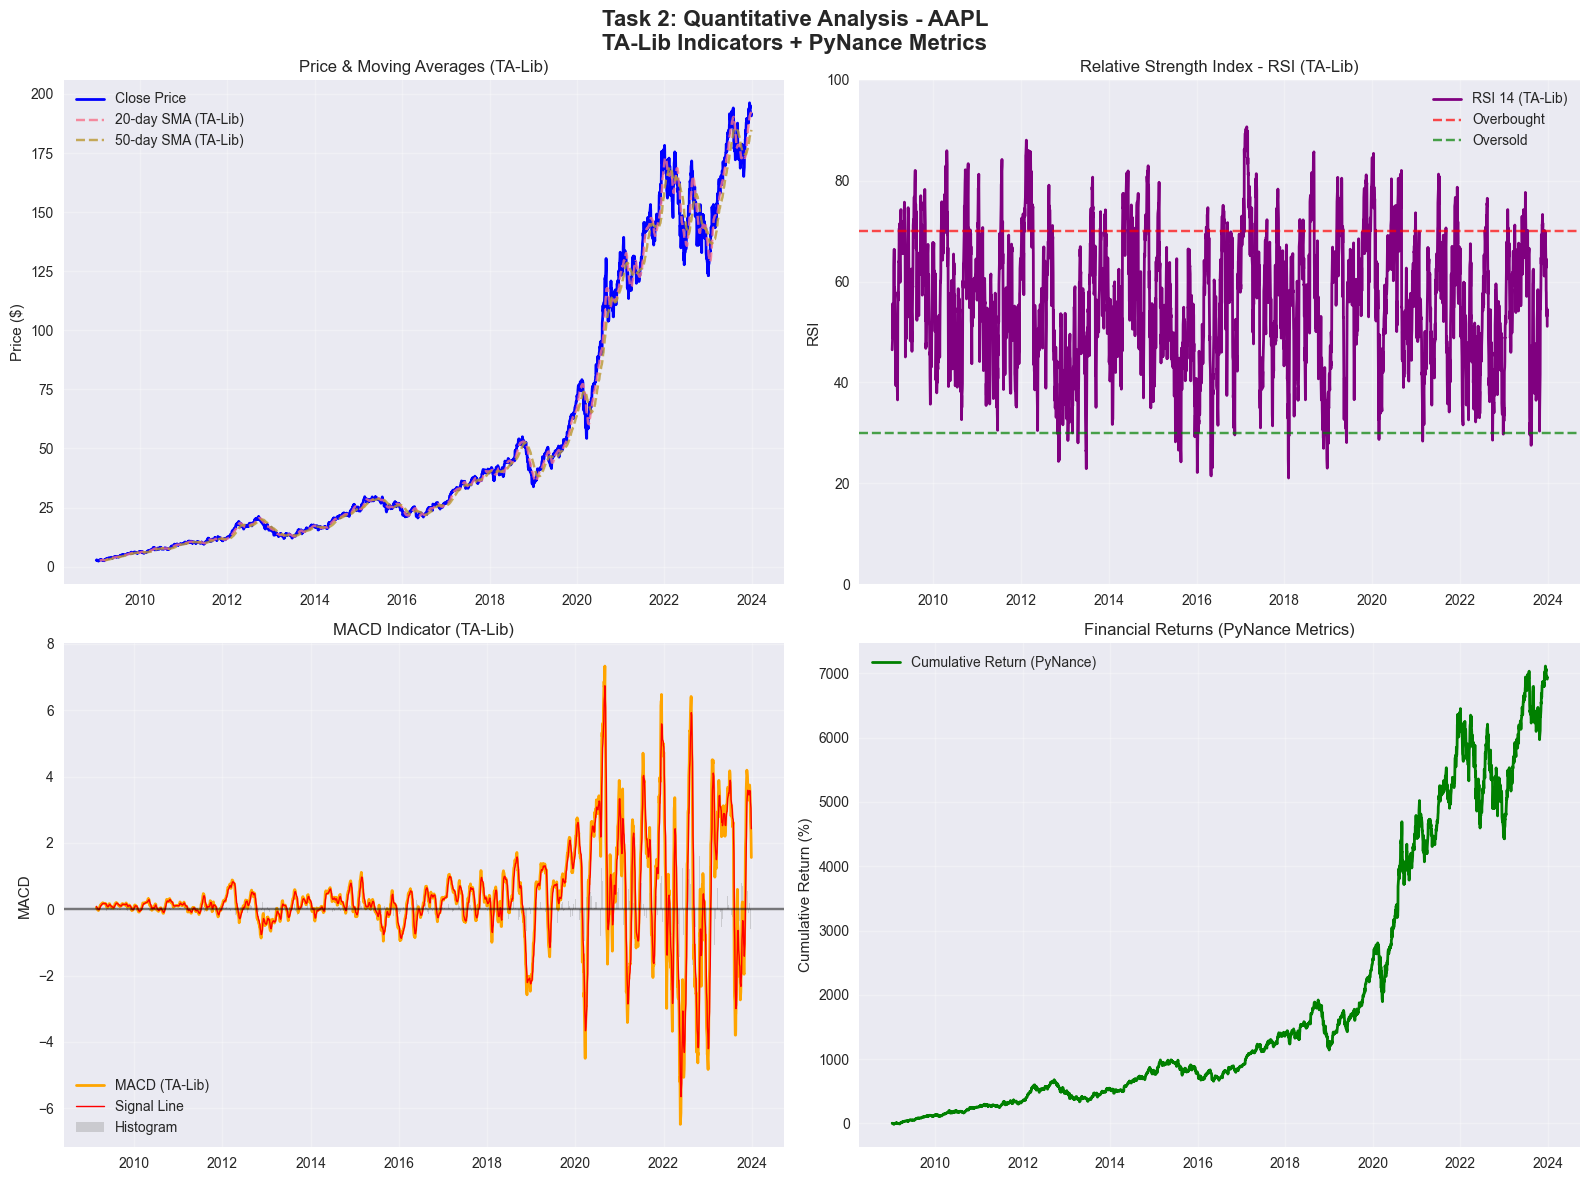

✅ Visualizations created successfully!

📋 AAPL SUMMARY:
   Current Price: $190.73
   RSI: 51.12
   MACD: 1.5595
   Cumulative Return: 6907.74%

ANALYZING: AMZN
✅ AMZN: Loaded 3774 rows with required columns
📊 Applying TA-Lib Technical Indicators...
✅ TA-Lib indicators calculated successfully!
💰 Calculating PyNance Financial Metrics for AMZN...
⚠️ PyNance specific functions unavailable, using manual calculations: module 'pynance' has no attribute 'Data'
📈 Creating Comprehensive Visualizations...


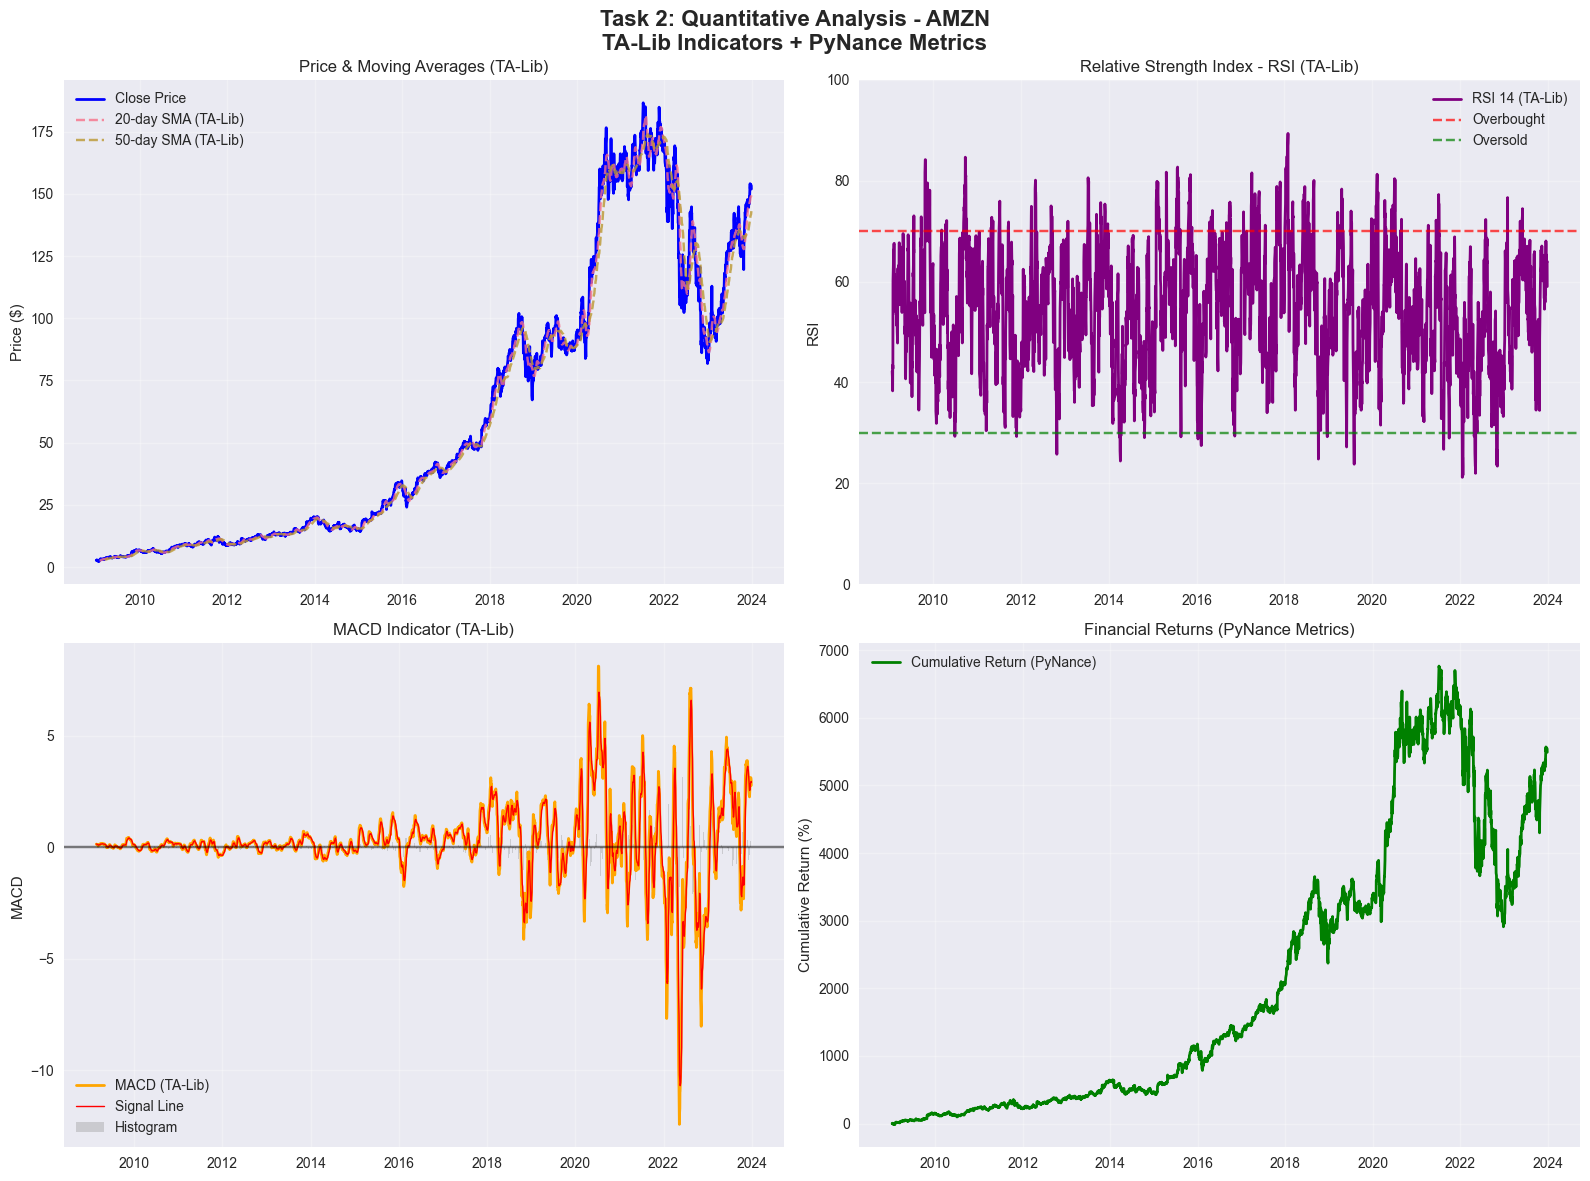

✅ Visualizations created successfully!

📋 AMZN SUMMARY:
   Current Price: $151.94
   RSI: 59.01
   MACD: 2.7820
   Cumulative Return: 5490.14%

ANALYZING: GOOG
✅ GOOG: Loaded 3774 rows with required columns
📊 Applying TA-Lib Technical Indicators...
✅ TA-Lib indicators calculated successfully!
💰 Calculating PyNance Financial Metrics for GOOG...
⚠️ PyNance specific functions unavailable, using manual calculations: module 'pynance' has no attribute 'Data'
📈 Creating Comprehensive Visualizations...


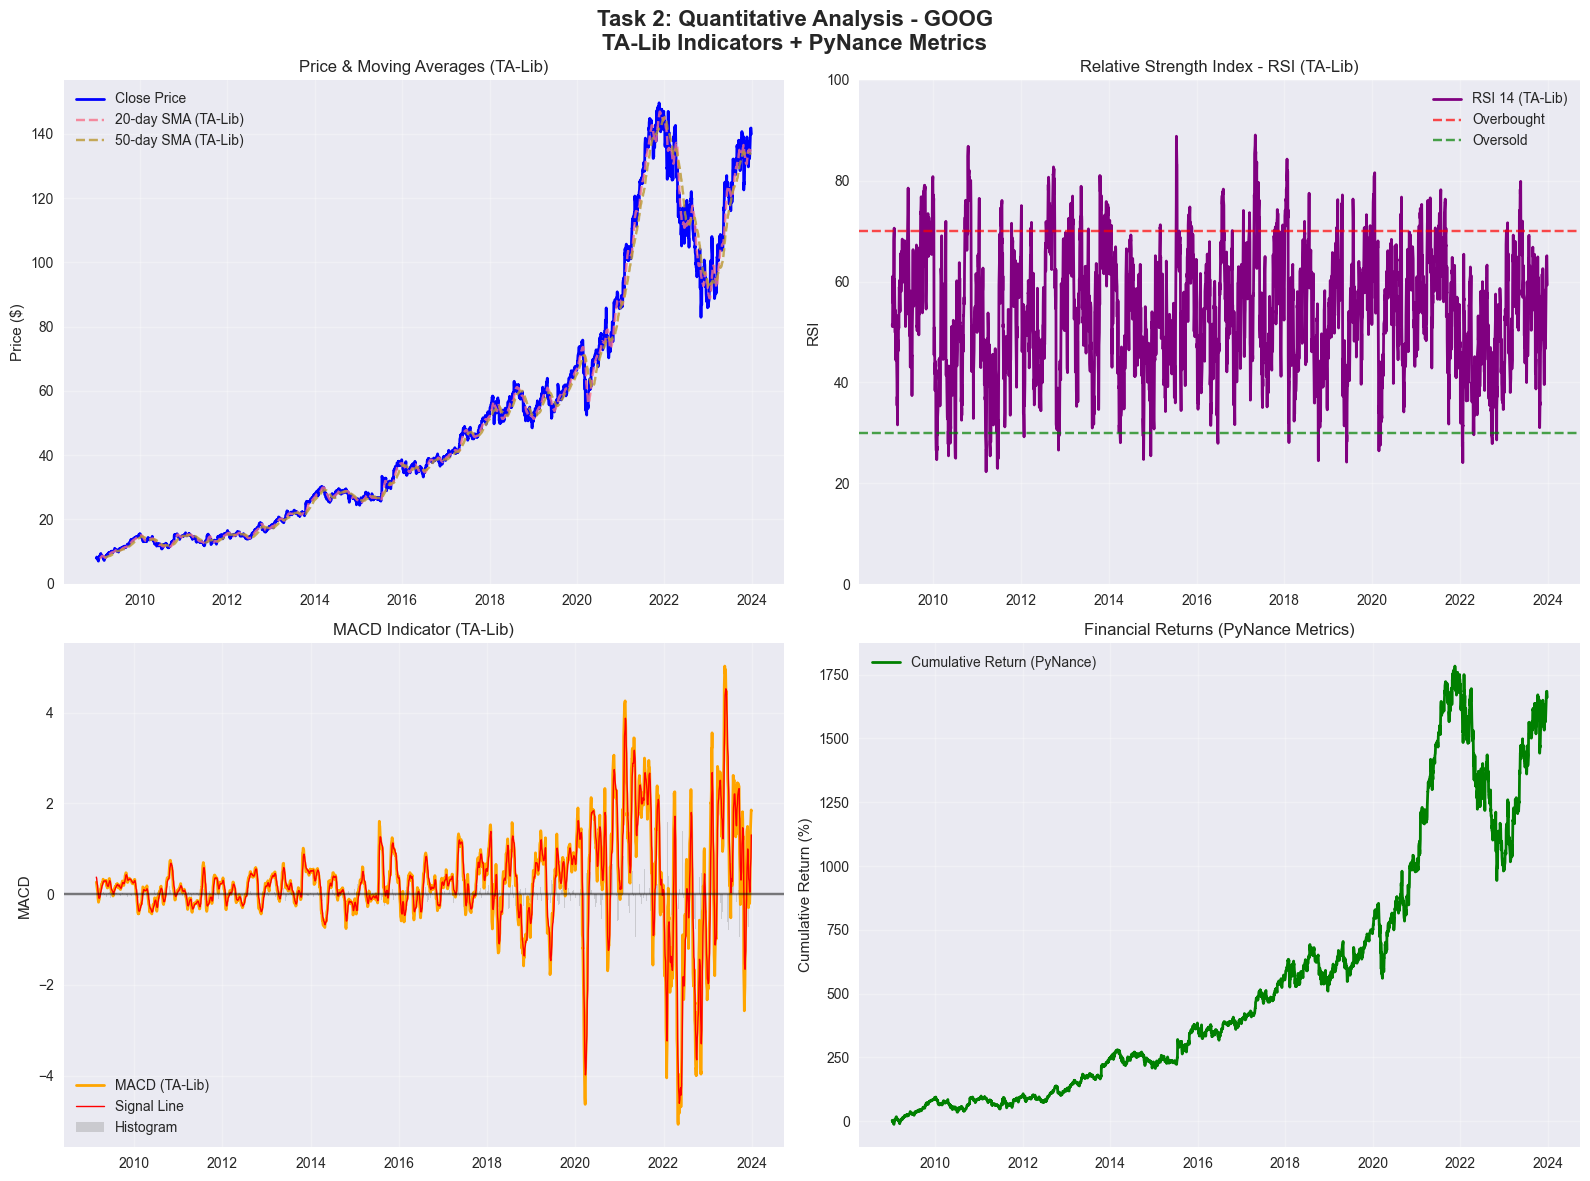

✅ Visualizations created successfully!

📋 GOOG SUMMARY:
   Current Price: $139.97
   RSI: 59.31
   MACD: 1.8428
   Cumulative Return: 1660.96%

ANALYZING: META
✅ META: Loaded 2923 rows with required columns
📊 Applying TA-Lib Technical Indicators...
✅ TA-Lib indicators calculated successfully!
💰 Calculating PyNance Financial Metrics for META...
⚠️ PyNance specific functions unavailable, using manual calculations: module 'pynance' has no attribute 'Data'
📈 Creating Comprehensive Visualizations...


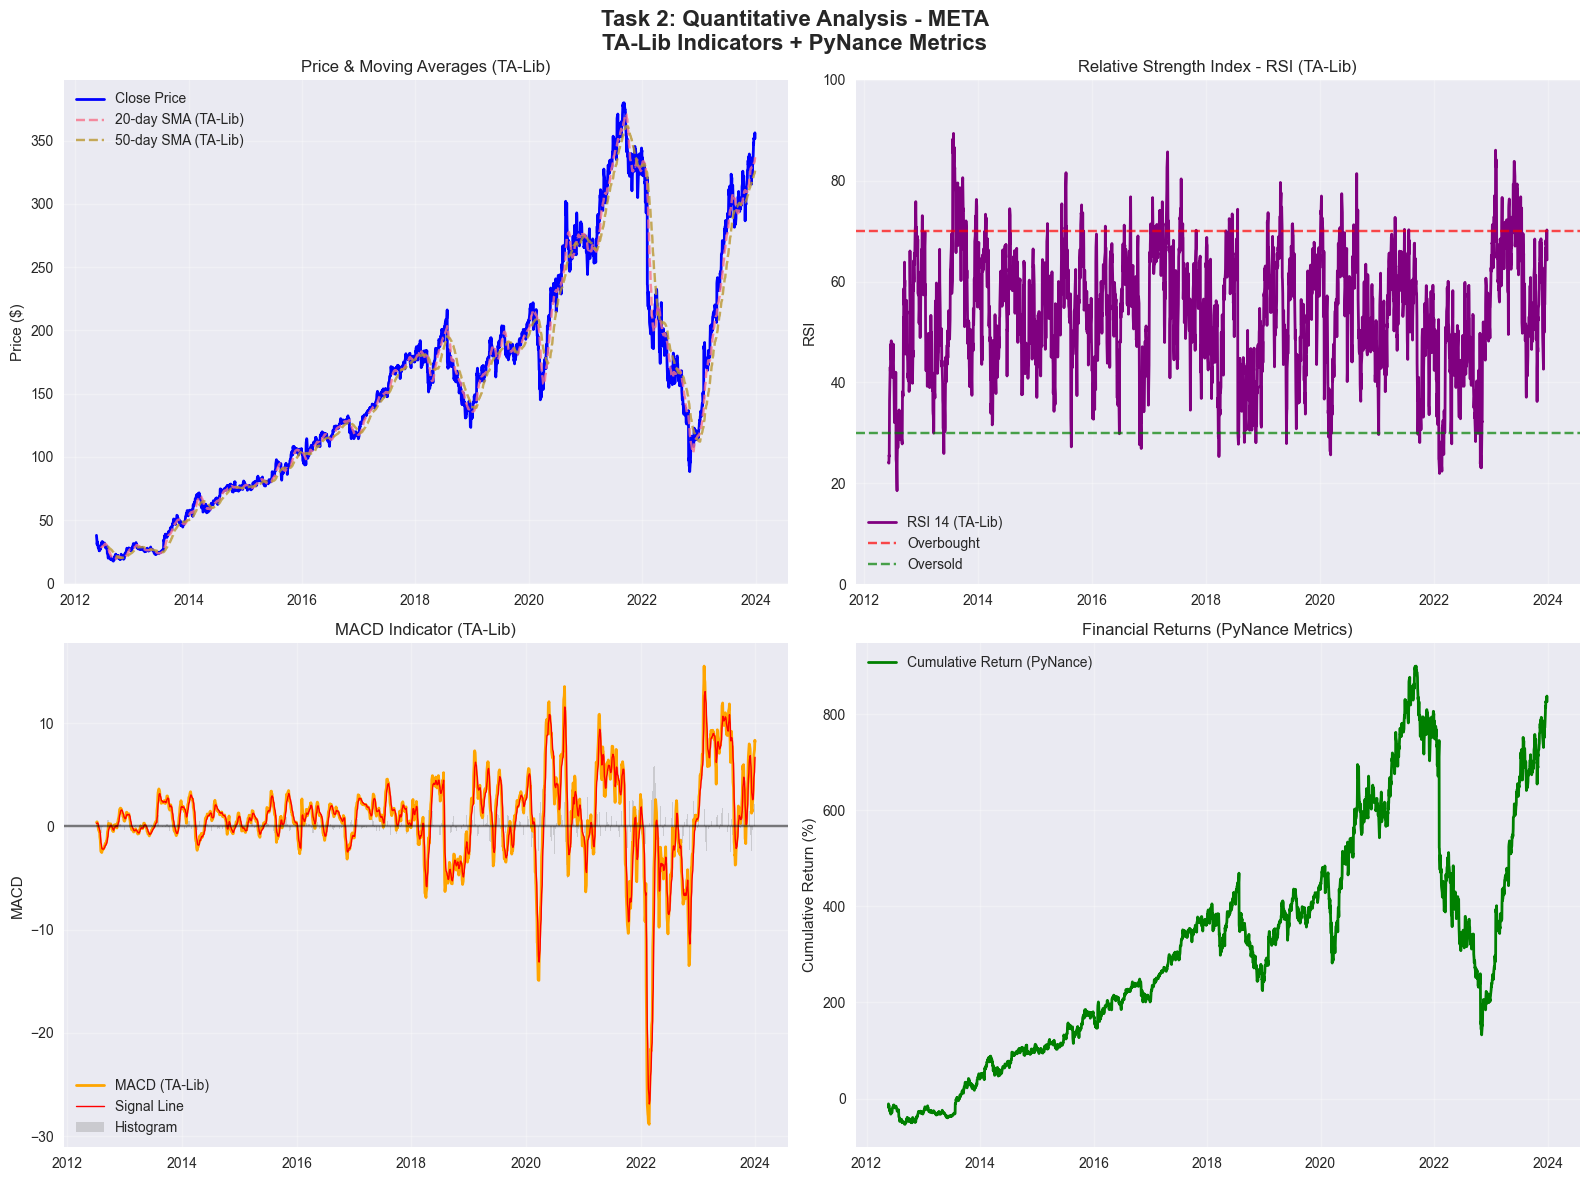

✅ Visualizations created successfully!

📋 META SUMMARY:
   Current Price: $351.79
   RSI: 64.30
   MACD: 8.1933
   Cumulative Return: 825.87%

ANALYZING: MSFT
✅ MSFT: Loaded 3774 rows with required columns
📊 Applying TA-Lib Technical Indicators...
✅ TA-Lib indicators calculated successfully!
💰 Calculating PyNance Financial Metrics for MSFT...
⚠️ PyNance specific functions unavailable, using manual calculations: module 'pynance' has no attribute 'Data'
📈 Creating Comprehensive Visualizations...


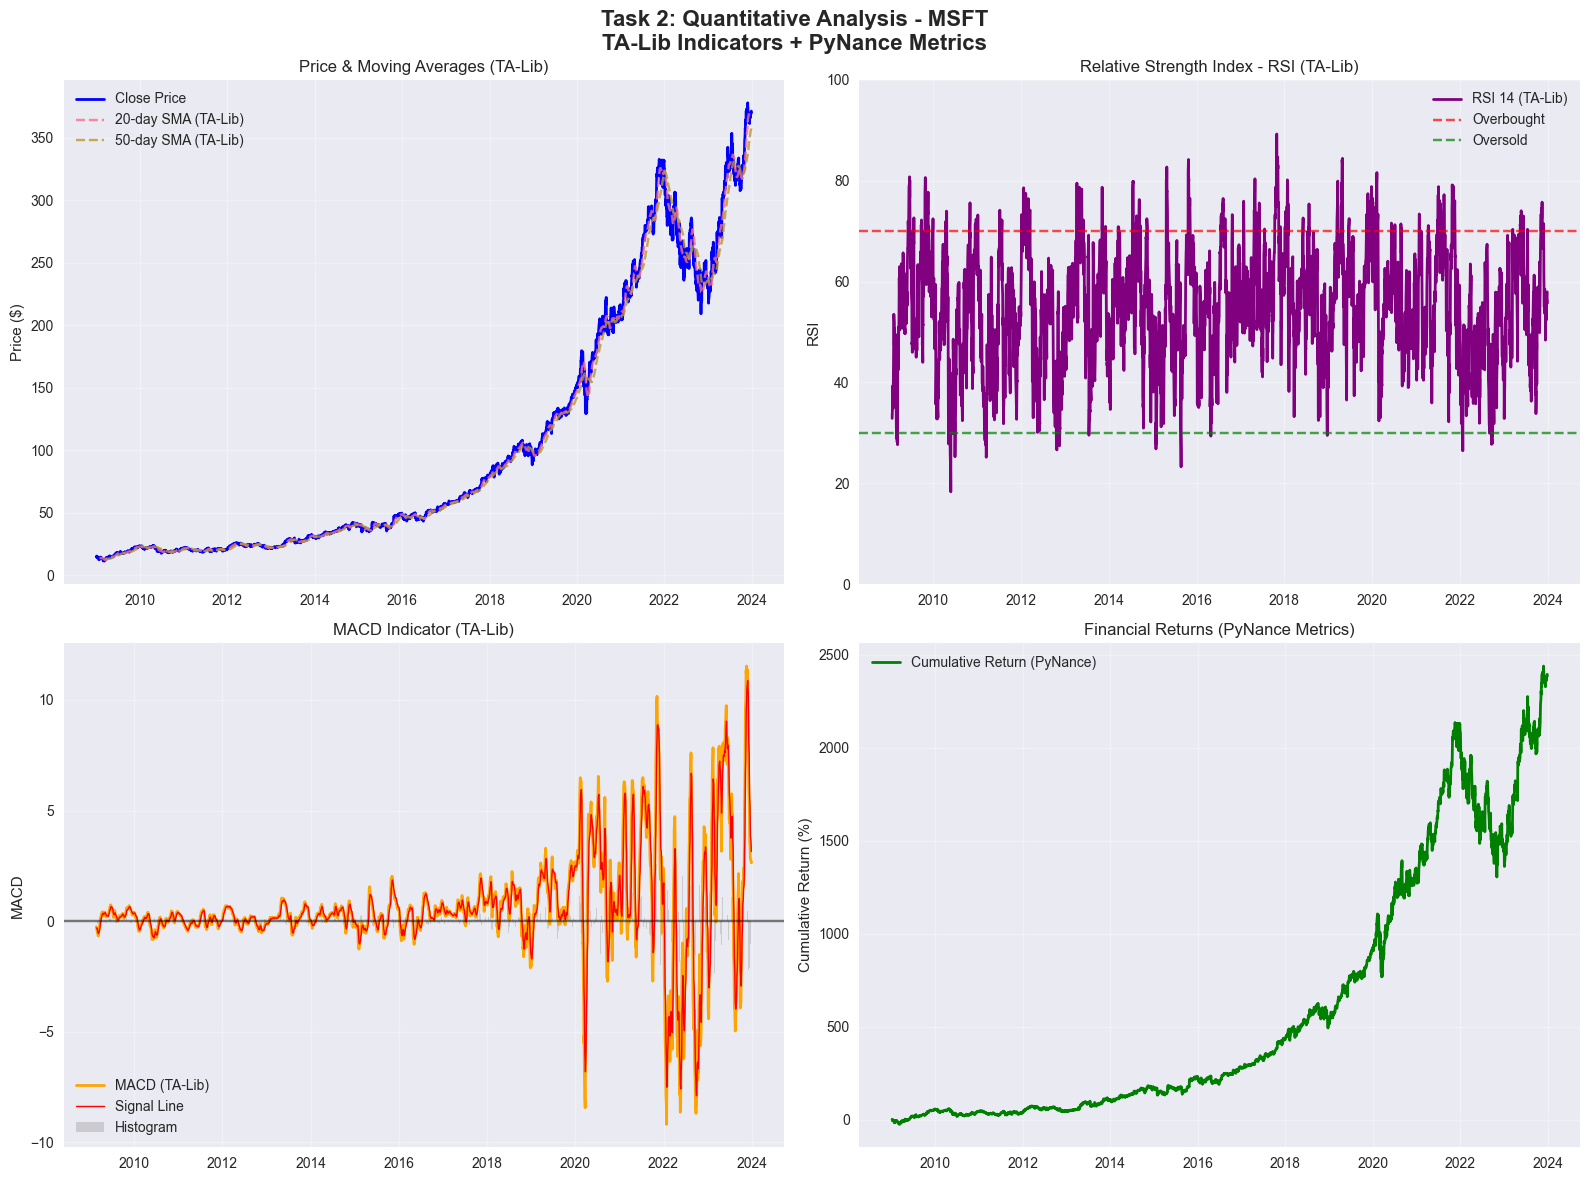

✅ Visualizations created successfully!

📋 MSFT SUMMARY:
   Current Price: $371.21
   RSI: 57.95
   MACD: 2.6536
   Cumulative Return: 2395.86%

ANALYZING: NVDA
✅ NVDA: Loaded 3774 rows with required columns
📊 Applying TA-Lib Technical Indicators...
✅ TA-Lib indicators calculated successfully!
💰 Calculating PyNance Financial Metrics for NVDA...
⚠️ PyNance specific functions unavailable, using manual calculations: module 'pynance' has no attribute 'Data'
📈 Creating Comprehensive Visualizations...


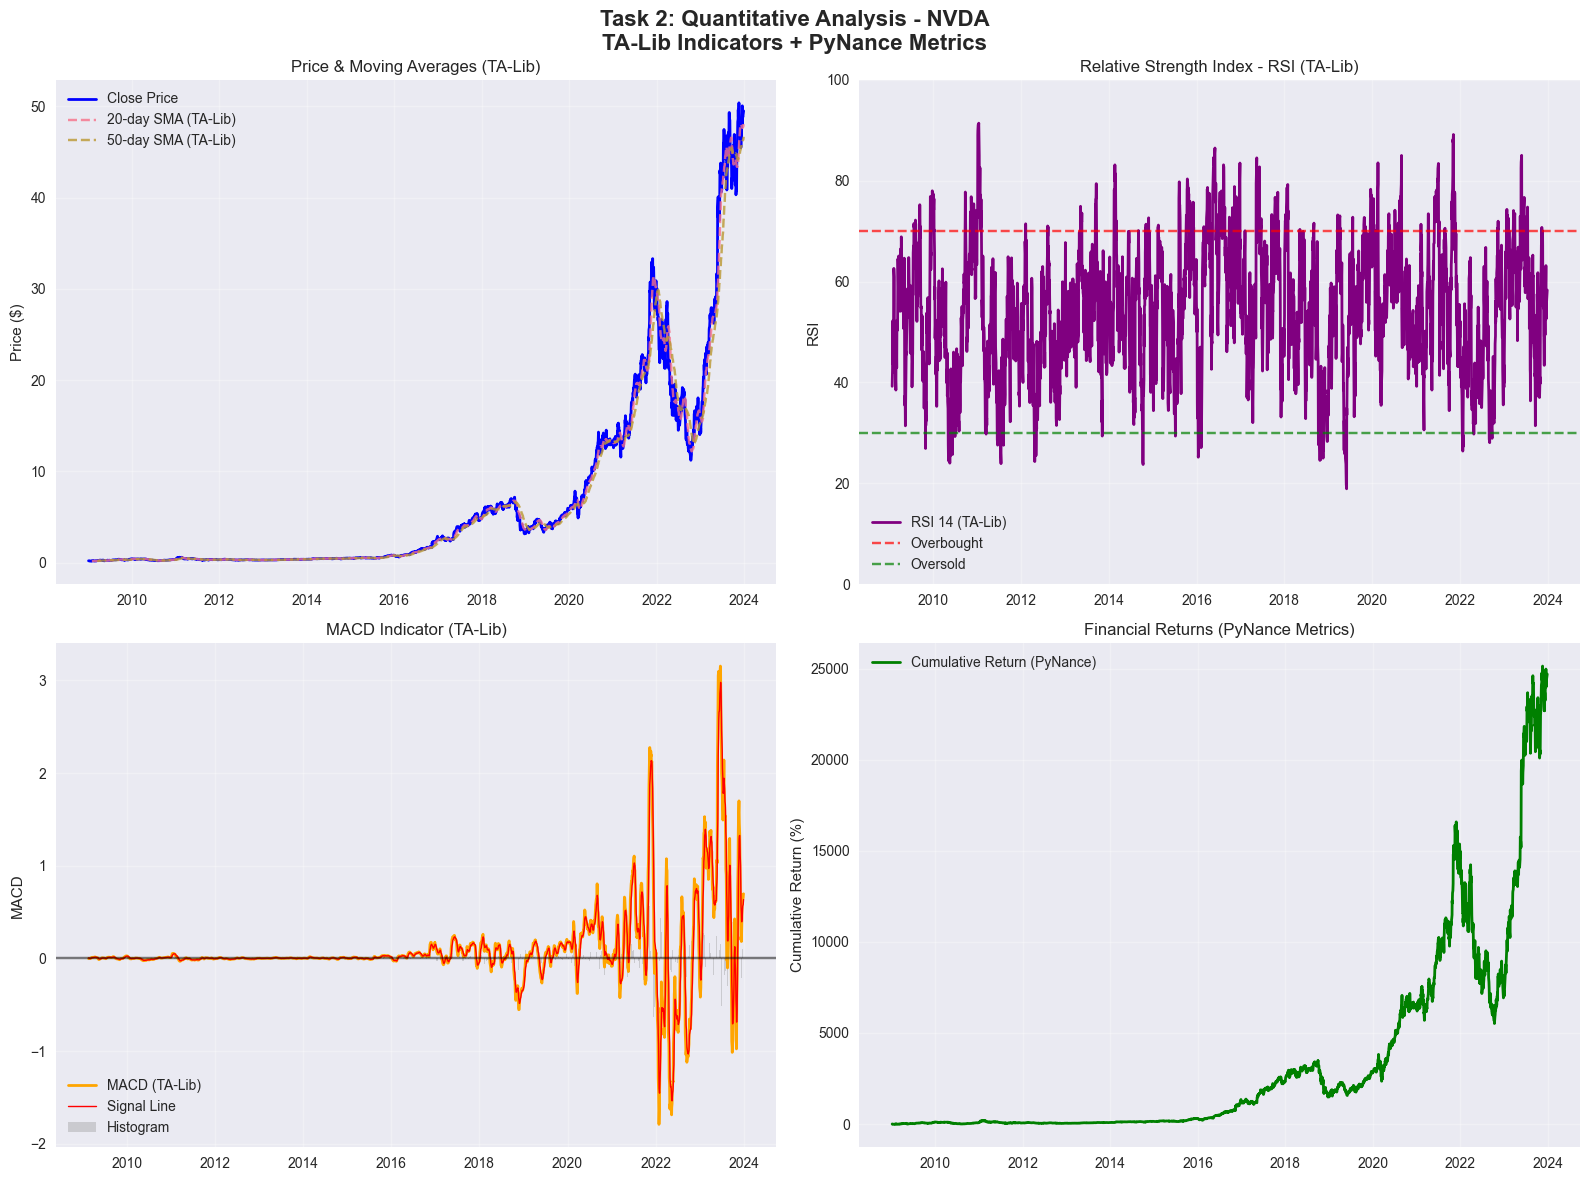

✅ Visualizations created successfully!

📋 NVDA SUMMARY:
   Current Price: $49.50
   RSI: 58.31
   MACD: 0.6975
   Cumulative Return: 24691.75%

🎉 Task 2 Complete: Analyzed 6 stocks with TA-Lib + PyNance


In [22]:
# Extended Analysis: Apply to all stocks
def analyze_all_stocks(symbols):
    """
    Apply the complete analysis to all stock files
    """
    results = {}
    
    for symbol in symbols:
        print(f"\n{'='*50}")
        print(f"ANALYZING: {symbol}")
        print(f"{'='*50}")
        
        # Load data
        df = load_stock_data(symbol)
        if df is not None:
            # Apply TA-Lib indicators
            df = calculate_ta_indicators(df)
            
            # Apply PyNance metrics
            df = calculate_pynance_metrics(df, symbol)
            
            # Store results
            results[symbol] = df
            
            # Create visualizations
            create_technical_visualizations(df, symbol)
            
            # Print summary statistics
            latest = df.iloc[-1]
            print(f"\n📋 {symbol} SUMMARY:")
            print(f"   Current Price: ${latest['Close']:.2f}")
            print(f"   RSI: {latest['RSI_14']:.2f}")
            print(f"   MACD: {latest['MACD']:.4f}")
            print(f"   Cumulative Return: {latest['Cumulative_Return_PN']*100:.2f}%")
    
    return results

# Analyze all your stocks
stock_symbols = ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA']
all_results = analyze_all_stocks(stock_symbols)

print(f"\n🎉 Task 2 Complete: Analyzed {len(all_results)} stocks with TA-Lib + PyNance")

In [8]:
def generate_trading_signals(comparison_df):
    """
    Generate trading signals based on technical indicators
    """
    print("🎯 TRADING SIGNALS SUMMARY")
    print("=" * 50)
    
    for _, stock in comparison_df.iterrows():
        signals = []
        
        # RSI signals
        if stock['RSI_14'] > 70:
            signals.append("RSI: OVERBOUGHT ⚠️")
        elif stock['RSI_14'] < 30:
            signals.append("RSI: OVERSOLD 💡")
        else:
            signals.append("RSI: NEUTRAL")
            
        # MACD signals
        if stock['MACD'] > 0:
            signals.append("MACD: BULLISH 📈")
        else:
            signals.append("MACD: BEARISH 📉")
            
        # Moving Average signals
        signals.append(f"SMA20: {stock['SMA_20_Signal']}")
        
        print(f"\n{stock['Symbol']}:")
        print(f"  Price: ${stock['Current_Price']:.2f}")
        print(f"  Return: {stock['Total_Return_%']:.2f}%")
        print(f"  Signals: {', '.join(signals)}")

if 'comparison_results' in locals():
    generate_trading_signals(comparison_results)

🎯 TRADING SIGNALS SUMMARY

AAPL:
  Price: $190.73
  Return: 6907.74%
  Signals: RSI: NEUTRAL, MACD: BULLISH 📈, SMA20: Below

AMZN:
  Price: $151.94
  Return: 5490.14%
  Signals: RSI: NEUTRAL, MACD: BULLISH 📈, SMA20: Above

GOOG:
  Price: $139.97
  Return: 1660.96%
  Signals: RSI: NEUTRAL, MACD: BULLISH 📈, SMA20: Above

META:
  Price: $351.79
  Return: 825.87%
  Signals: RSI: NEUTRAL, MACD: BULLISH 📈, SMA20: Above

MSFT:
  Price: $371.21
  Return: 2395.86%
  Signals: RSI: NEUTRAL, MACD: BULLISH 📈, SMA20: Above

NVDA:
  Price: $49.50
  Return: 24691.75%
  Signals: RSI: NEUTRAL, MACD: BULLISH 📈, SMA20: Above
